Amritha
Multilayer perceptron
16-11-22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
y=df['Outcome']
print(y)
df=df.drop(['Outcome'],axis=1)
x= df
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70      

In [7]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [8]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_train)

[[0.05882353 0.47738693 0.49180328 ... 0.3561848  0.07771136 0.01666667]
 [0.29411765 0.52763819 0.59016393 ... 0.54992548 0.03458582 0.11666667]
 [0.         0.67839196 0.55737705 ... 0.63040238 0.12254483 0.05      ]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]


In [14]:
#classifier
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', n_iter_no_change=10, random_state=1, max_iter=1000)
classifier.fit(x_train,y_train)
x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

In [15]:
print(y_test.values)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0]
[0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[122  29]
 [ 28  52]]


In [17]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_train, x_pred)
print(cm1)

[[304  45]
 [ 62 126]]


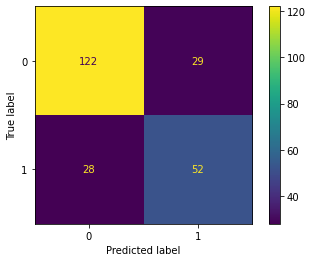

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test,y_pred)))
print('precision score: {}'.format(precision_score(y_test, y_pred, pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred, pos_label=0)))
print('f1 score:{}'.format(f1_score(y_test, y_pred, pos_label=0)))

Accuracy score: 0.7532467532467533
precision score: 0.8133333333333334
Recall score: 0.8079470198675497
f1 score:0.8106312292358804


In [24]:
classifier.coefs_

[array([[-1.89502926e-01,  9.76303164e-02, -2.45684905e-01,
         -2.53121353e-01, -2.33721826e-01, -6.44463821e-01,
         -5.88512485e-02, -1.39144621e-05],
        [ 3.15054694e-01,  3.70911428e-01, -1.63740148e-01,
          5.90127022e-01, -5.25843009e-01,  4.78340608e-01,
         -7.40682592e-01,  4.13167574e-05],
        [ 6.05731382e-02,  9.48206045e-02, -1.61982618e-01,
         -2.67411316e-01,  3.92571711e-01,  4.62901807e-01,
         -9.76217627e-02,  1.39797734e-04],
        [ 4.15465019e-01,  3.09120496e-01, -3.57917149e-02,
         -5.92152338e-01,  1.27766333e-02,  5.89223689e-01,
         -1.71906295e-01, -7.61337355e-10],
        [ 4.90823309e-01, -3.64776945e-03,  3.19835470e-01,
         -1.32434802e-01,  4.32378854e-01,  3.87078723e-01,
         -2.18124799e-01,  1.34165793e-03],
        [ 9.31668352e-01,  6.81636385e-01, -3.28673296e-01,
          6.81314393e-01, -4.74650714e-01, -6.63893418e-02,
          3.91323637e-01, -2.70141578e-04],
        [-1.2586

In [25]:
classifier.intercepts_

[array([-0.45697459,  0.06689107,  0.49746418, -0.04808224,  0.79238979,
         0.31580047,  0.69464481, -0.444001  ]),
 array([ 0.2961729 ,  0.04497823,  0.38753395,  0.40534861,  0.15610589,
        -0.33670211, -0.53898855, -0.46375766]),
 array([ 0.67271201,  0.60719075, -0.12875055,  0.42783594, -0.39932113,
        -0.457651  , -0.44693493,  0.15910877]),
 array([-0.11509445])]